In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy

In [ ]:
a = np.array([1,2,3])
a_diag = np.diag(a)
a = a.reshape(3, 1)
b = np.array([2, 2, 2], ndmin=2)
r1 = np.dot(a, b)
r2 = np.dot(a_diag, b.T)
r2

array([[2],
       [4],
       [6]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Titanic /train.csv')

In [ ]:
# help(sns.countplot)

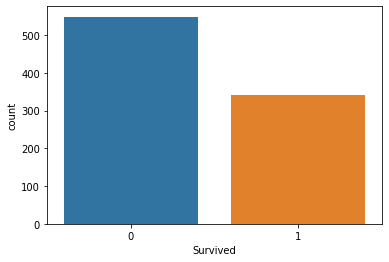

In [ ]:
sns.countplot(x='Survived', data=pd.DataFrame(df))

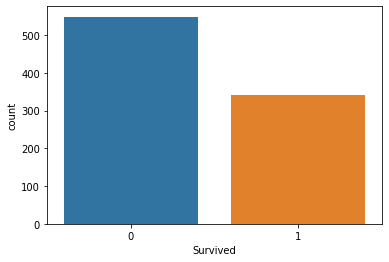

In [ ]:
sns.countplot(x='Survived', data=pd.DataFrame(df))

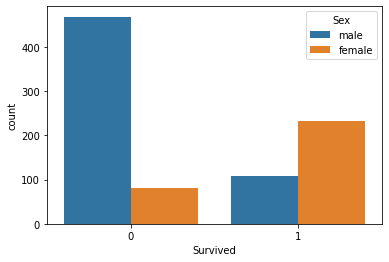

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df)

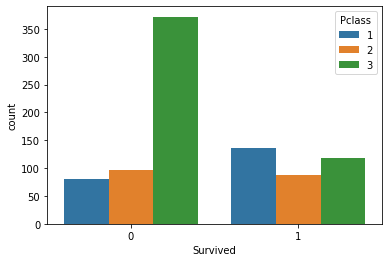

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=df)

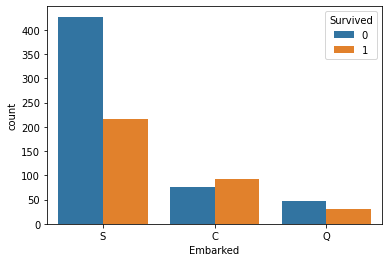

In [ ]:
sns.countplot(x="Embarked",hue='Survived', data=df)

In [ ]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
print(total)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [ ]:
def prepare_df(df):
    prepared_df = pd.DataFrame(df)
    prepared_df = prepared_df.drop(columns=['Name', 'Ticket', 'Cabin','PassengerId'])
    prepared_df['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)
    prepared_df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
    prepared_df['Age'].fillna(prepared_df['Age'].mean(), inplace=True)
    prepared_df['Embarked'].fillna(np.round(prepared_df['Embarked'].mean()), inplace=True)
    return prepared_df

processed_df = prepare_df(df)
print(processed_df)
print(processed_df.isna().sum())

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.000000      1      0   7.2500       0.0
1           1       1    1  38.000000      1      0  71.2833       1.0
2           1       3    1  26.000000      0      0   7.9250       0.0
3           1       1    1  35.000000      1      0  53.1000       0.0
4           0       3    0  35.000000      0      0   8.0500       0.0
..        ...     ...  ...        ...    ...    ...      ...       ...
886         0       2    0  27.000000      0      0  13.0000       0.0
887         1       1    1  19.000000      0      0  30.0000       0.0
888         0       3    1  29.699118      1      2  23.4500       0.0
889         1       1    0  26.000000      0      0  30.0000       1.0
890         0       3    0  32.000000      0      0   7.7500       2.0

[891 rows x 8 columns]
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
X = processed_df[processed_df.columns.difference(['Survived'])]
y = processed_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import sklearn
help(sklearn.neighbors.KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X.values, y.values)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
answers = []
TP, FP, FN, TN = 0, 0, 0, 0

for inputs, answer in zip(X_test.values, y_test.values):
    model_answer = model.predict(np.array(inputs, ndmin=2))
    if model_answer == answer:
        answers.append(1)
    else:
        answers.append(0)
    
    if model_answer == answer == 1:
        TP += 1
    elif model_answer == answer == 0:
        TN += 1
    elif model_answer != answer and model_answer == 1:
        FP += 1
    elif model_answer != answer and model_answer == 0:
        FN += 1
print('accuracy is ', sum(answers)/len(answers))
print('TP ', (TP))
print('FP ', (FP))
print('FN ', (FN))
print('TN ', (TN))

accuracy is  0.8491620111731844
TP  45
FP  11
FN  16
TN  107


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


[0.         0.09322034 1.        ] [0.         0.73770492 1.        ]


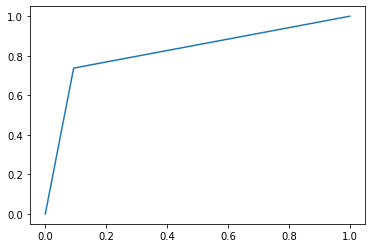

In [ ]:
tpr = TP/(TP + FP)
fpr = FP/(FP + TN)
y_pred = model.predict(X_test) 
from sklearn.metrics import roc_curve
FPR, TPR, threshold = roc_curve(y_test, y_pred)

fig, axs = plt.subplots(1)
axs.plot(FPR, TPR)

print(FPR, TPR)


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(np.array(X_test, ndmin=2))
conf_matr = confusion_matrix(y_test, y_pred)
print(conf_matr)
print(np.flip(conf_matr).T)
tn, fp, fn, tp = conf_matr.ravel()
print('tp ', tp)
print('fp ', fp)
print('fn ', fn)
print('tn ', tn)

[[107  11]
 [ 16  45]]
[[ 45  11]
 [ 16 107]]
tp  45
fp  11
fn  16
tn  107


In [ ]:
precision = TP/ (TP + FP)
print('precision is', precision)

recall = TP / (TP + FN)
print('recall is ', recall)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print('accuracy is', accuracy)

precision is 0.8035714285714286
recall is  0.7377049180327869
accuracy is 0.8491620111731844


In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# help(SGDClassifier)

Help on class SGDClassifier in module sklearn.linear_model._stochastic_gradient:

class SGDClassifier(BaseSGDClassifier)
 |  SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 |  
 |  Linear classifiers (SVM, logistic regression, etc.) with SGD training.
 |  
 |  This estimator implements regularized linear models with stochastic
 |  gradient descent (SGD) learning: the gradient of the loss is estimated
 |  each sample at a time and the model is updated along the way with a
 |  decreasing strength schedule (aka learning rate). SGD allows minibatch
 |  (online/out-of-core) learning via the `partial_fit` method.
 |  For best results using the default learning rate schedule, the data sho

In [ ]:
sgdClassifierModel = SGDClassifier()
sgdClassifierModel.fit(X_train, y_train)
y_pred = sgdClassifierModel.predict(X_test)

conf_matr = confusion_matrix(y_test, y_pred)
print(np.flip(conf_matr).T)
tn, fp, fn, tp = conf_matr.ravel()
print('tp ', tp)
print('fp ', fp)
print('fn ', fn)
print('tn ', tn)

[[67 38]
 [10 64]]
tp  67
fp  38
fn  10
tn  64


In [ ]:
precision = tp/ (tp + fp)
print('precision is', precision)

recall = tp / (tp + fn)
print('recall is ', recall)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy is', accuracy)

precision is 0.638095238095238
recall is  0.8701298701298701
accuracy is 0.7318435754189944


In [ ]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, hidden_layers, 
                 output_nodes,  learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
        self.node_params = [input_nodes]
        
        for i in range(hidden_layers):
            self.node_params.append(hidden_nodes)
            
        self.node_params.append(output_nodes)
                
        self.transition_count = hidden_layers + 1
        self.weights = []
        self.biases = []
        for i in range(self.transition_count):
            row, column = self.node_params[i + 1], self.node_params[i]
            self.weights.append(
                np.random.normal(0.0, pow(column, -0.5), (row, column))
            ) 
            self.biases.append(
                np.random.normal(
                    0.0 - pow(self.hnodes, -0.5), 0.0 + pow(self.hnodes, -0.5),
#                     0.0, pow(row, -0.5),
                    (row, 1))
            )
        self.activation_func = lambda x:scipy.special.expit(x.astype('float'))   
        self.epochs = []
        self.efficiency = []
        self.efficiency_on_train = []
        self.outputs = [None] * (self.transition_count + 1)
        self.errors = [None] * (self.transition_count + 1)
        
        
        
    def train_one_data_set(self, inputs_list, targets_list ):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
       
        remarks = []
        biases = []
        
        self.outputs[0] = inputs # zero (pseudo) outputs is an input in NN
        for i in range(self.transition_count):
            self.outputs[i + 1] = self.activation_func(
                np.dot(self.weights[i], self.outputs[i]) + self.biases[i]
            )
    
        self.errors[self.transition_count] = targets - self.outputs[self.transition_count]
        for i in reversed(range(self.transition_count)):
            self.errors[i] =  np.dot(self.weights[i].T, self.errors[i + 1])
        
        
        for i in reversed(range(self.transition_count)):
            remarks.insert(0, self.lr
                           * np.dot
                           (
                (self.errors[i + 1] * self.outputs[i + 1] * (1.0 - self.outputs[i + 1])),
                np.transpose(self.outputs[i])
                           )
            )
        
        for i in reversed(range(self.transition_count)):
            biases.insert(0, self.lr * self.errors[i + 1] 
                        * self.outputs[i + 1] * (1 - self.outputs[i + 1])
                       )
        return np.array(remarks, dtype=object), np.array(biases, dtype=object)
                    
                
    def train_one_batch(self, batch, vectored_targets):
        weight_remarks, bias_remarks = [], [] # каждый элемент - правка по каждому train set
        for i, one_train_dataset in enumerate(batch):
            one_data_set_remarks, one_data_set_bias_remarks = self.train_one_data_set(one_train_dataset, vectored_targets[i])
            weight_remarks.append(one_data_set_remarks)
            bias_remarks.append(one_data_set_bias_remarks)
            
        # суммирование по каждому обучающему набору внутри батча
        summed_weight_remarks = np.array(weight_remarks, dtype=object, ndmin=2).sum(axis=0) # like a tensor (batch_size, transition_count, (n,m)-error correction matrix)
#         print(len(bias_remarks))
        summed_bias_remarks = np.array(bias_remarks, dtype=object, ndmin=2).sum(axis=0)        
        
        for i, (correct_weights, correct_biases) in enumerate(zip(summed_weight_remarks, summed_bias_remarks)):
            self.weights[i] = self.weights[i] + correct_weights
            self.biases[i] = self.biases[i] + correct_biases
        
    def train(self, X, y, test_X, test_y, epochs, batch_size):
        self.epochs = []
        self.efficiency = []
        self.efficiency_on_train = []
        for e in range(epochs):
            batch_count = int(math.ceil(len(y) / batch_size))
            for i in range(batch_count):
                batch = X[i * batch_size : (i + 1) * batch_size]
                targets = y[i * batch_size : (i + 1) * batch_size]
                vectored_targets = [np.zeros(self.onodes) + 0.01 for i in targets]
                for target_value, zero_vector in zip(targets, vectored_targets):
                    zero_vector[target_value] = 0.99 # max value
                self.train_one_batch(batch, vectored_targets)
    
            self.efficiency.append(self.calc_efficiency(test_X, test_y))
            self.efficiency_on_train.append(self.calc_efficiency(X, y))
            self.epochs.append(e)
                        
    def calc_efficiency(self, test_X, test_y):
        scorecard = []
        for (inputs, outputs) in zip(test_X, test_y):
            correct_label = outputs
            result = self.query(inputs)
            self_label = np.argmax(result)
            if correct_label == self_label:
                scorecard.append(1)
            else:
                scorecard.append(0)
        
        scorecard_array = np.array(scorecard)
        return scorecard_array.sum() / scorecard_array.size
    
    def query(self, inputs):        
        outputs = np.array(inputs).reshape((len(inputs), 1))
        for i in range(self.transition_count):
            inputs = outputs
            outputs = self.activation_func(
                np.dot(self.weights[i], inputs) 
                + self.biases[i]
            )            
        return outputs
        

In [ ]:
X_train.loc[0].size

7

In [ ]:
input_nodes = 7
hidden_nodes = 300
hidden_layers = 3
output_nodes = 2
learning_rate = 0.01

nn = NeuralNetwork(input_nodes, hidden_nodes, hidden_layers,
                   output_nodes, learning_rate )
nn.train(X_train.values, y_train.values, X_test.values, y_test.values, 100, 1)

In [ ]:
y_pred = []
for test in X_test.values:    
    res = np.argmax(nn.query(test))
    y_pred.append(res)
conf_matr = confusion_matrix(y_test, y_pred)
np.flip(conf_matr).T

array([[31, 16],
       [37, 95]], dtype=int64)

In [ ]:
tn, fp, fn, tp = conf_matr.ravel()
print('tp ', tp)
print('fp ', fp)
print('fn ', fn)
print('tn ', tn)

precision = tp/ (tp + fp)
print('precision is', precision)

recall = tp / (tp + fn)
print('recall is ', recall)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy is', accuracy)

tp  31
fp  16
fn  37
tn  95
precision is 0.6595744680851063
recall is  0.45588235294117646
accuracy is 0.7039106145251397


In [ ]:
def min_max_scale(df, columns_name):
    for col_name in columns_name:
        max_val = df[col_name].max()
        min_val = df[col_name].min()
        df[col_name] = df[col_name].apply(lambda x : (x - min_val)/ (max_val - min_val))
    return df

In [ ]:
X_train, X_test = min_max_scale(X_train, ['Age', 'Fare']),  min_max_scale(X_test, ['Age', 'Fare'])

In [ ]:
X_test

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
23,0.387900,0.0,0.143422,0,1,0,0
195,0.814947,0.5,0.591953,0,1,1,0
187,0.629893,0.0,0.107264,0,1,0,0
225,0.302491,0.0,0.037775,0,3,0,0
712,0.672598,0.0,0.210083,0,1,0,1
...,...,...,...,...,...,...,...
129,0.629893,0.0,0.028179,0,3,0,0
642,0.017794,0.0,0.112718,2,3,1,3
518,0.501779,0.0,0.105042,0,2,1,1
78,0.001139,0.0,0.117162,2,2,0,0


In [ ]:
input_nodes = 7
hidden_nodes = 1_000
hidden_layers = 0
output_nodes = 2
learning_rate = 0.1

nn = NeuralNetwork(input_nodes, hidden_nodes, hidden_layers,
                   output_nodes, learning_rate )
nn.train(X_train.values, y_train.values, X_test.values, y_test.values, 15, 10)

In [ ]:
y_pred = []
for test in X_test.values:    
    res = np.argmax(nn.query(test))
    y_pred.append(res)
print(len(y_pred))
conf_matr = confusion_matrix(y_test, y_pred)
print(np.flip(conf_matr).T)
print('***********************************')


tn, fp, fn, tp = conf_matr.ravel()
print('tp ', tp)
print('fp ', fp)
print('fn ', fn)
print('tn ', tn)

precision = tp/ (tp + fp)
print('precision is', precision)

recall = tp / (tp + fn)
print('recall is ', recall)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print('accuracy is', accuracy)

179
[[51 11]
 [21 96]]
***********************************
tp  51
fp  11
fn  21
tn  96
precision is 0.8225806451612904
recall is  0.7083333333333334
accuracy is 0.8212290502793296
